In [66]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

CELL BELOW:
initiate node count, and connection between nodes (edge)

In [190]:
num_nodes = 10
edges = [(1, 2), (1, 3), (1, 4), (2, 5), (2, 6), (2, 7),
         (3, 7), (3, 8), (4, 9), (5, 6), (7, 10), (9, 10)]

CELL BELOW:
define class nga mag generate kang graph for our bidirectional BFS which would be using edges to generate paths which will define the look of the graph

In [217]:
class Graph: #class nga gahimo kang adjacency list graph contains functions...
    def __init__(self, num_nodes, edges): #tana ja ang constructor
        self.num_nodes = num_nodes
        self.data = [[] for _ in range(num_nodes + 1)]
        for n1, n2 in edges:
            self.data[n1].append(n2)
            self.data[n2].append(n1)
        self.data.pop(0) #pop ko kay di kaya isipon kang range and num_nodes kay ga array counting sha ya (from 0) te i +1 ko. te tapos maappend ako don, mahimo paths, gahimo sha blank nga path sa una as result kang pag +1 sa range so kinanglan i-pop otherwise detrimental tana sasequences karon.
        #example, may num_nodes ako nga 10, mahimo ran nga 0 to 9 pero i + 1 ko para mahimo nga 0-10 tapos i pop(0) ko para i delete ang zero para mahimo nga 1-10 ezpz
    
    def __repr__(self): #function nga ginarewrite and data into dictionary syntax or adjacency list
        return"\n".join(["{}: {}".format(n+1, neighbors) for n, neighbors in enumerate(self.data)])
    
    def __str__(self): #function nga ginatawag ang __repr__ automatically
        return self.__repr__()
    
    def get_adjacency_list(self):
        adjacency_list = {}
        for n, neighbors in enumerate(self.data):
            adjacency_list[n + 1] = neighbors
        return adjacency_list
    

start_node = 10
target_node = 5

g1 = Graph(num_nodes, edges)
graph = g1.get_adjacency_list() #reassign contents kang g1 into graph dictionary
print("g1.data Adjacency List:\n(Node: [Neighbor Node, Neighbor Node, ...])")
print(g1)
print("graph Adjacency List: \n(Node: [Neighbor Node, Neighbor Node, ...])")
print(graph)

g1.data Adjacency List:
(Node: [Neighbor Node, Neighbor Node, ...])
1: [2, 3, 4]
2: [1, 5, 6, 7]
3: [1, 7, 8]
4: [1, 9]
5: [2, 6]
6: [2, 5]
7: [2, 3, 10]
8: [3]
9: [4, 10]
10: [7, 9]
graph Adjacency List: 
(Node: [Neighbor Node, Neighbor Node, ...])
{1: [2, 3, 4], 2: [1, 5, 6, 7], 3: [1, 7, 8], 4: [1, 9], 5: [2, 6], 6: [2, 5], 7: [2, 3, 10], 8: [3], 9: [4, 10], 10: [7, 9]}


CELL BELOW:
Used ChatGPT to generate a matplotlib + networkx visual aid for the graph.

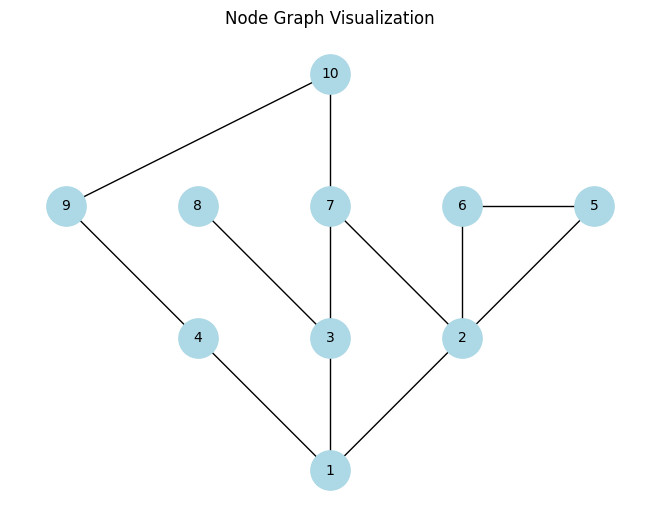

In [218]:
# Create an empty NetworkX graph
nx_graph = nx.Graph()

# Add nodes to the NetworkX graph
nx_graph.add_nodes_from(range(1, g1.num_nodes + 1))  # Use g1.num_nodes instead of num_nodes

# Add edges to the NetworkX graph based on your custom graph's data
for node, neighbors in enumerate(g1.data, start=1):
    for neighbor in neighbors:
        nx_graph.add_edge(node, neighbor)

# Perform a breadth-first search to determine node generations
generations = {}  # Dictionary to store the generation of each node
bfs_tree = nx.bfs_tree(nx_graph, source=1)
for node in bfs_tree.nodes:
    generations[node] = len(nx.shortest_path(bfs_tree, 1, node)) - 1

# Create a new NetworkX graph with "generation" attributes
nx_graph_with_attributes = nx.Graph()
for node, generation in generations.items():
    nx_graph_with_attributes.add_node(node, generation=generation)

for edge in nx_graph.edges:
    nx_graph_with_attributes.add_edge(edge[0], edge[1])

# Generate hierarchical positions for nodes
pos = nx.multipartite_layout(nx_graph_with_attributes, subset_key="generation", align="horizontal")

# Draw the graph using matplotlib
nx.draw(nx_graph_with_attributes, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=10, font_color='black')
plt.title("Node Graph Visualization")
plt.show()

CELL BELOW:
BFS Attempt

In [219]:
def BFS(graph, start_node, target_node):
    global BFSPath #extract ang BFSPath para magamit outside kang bfs function
    visited = set()
    queue = deque([(start_node, [start_node])])

    while queue:
        node, path = queue.popleft()
        if node == target_node:
            print("Shortest path:", ' -> '.join(map(str, path)))
            BFSPath = [path]
            return path
        if node not in visited:
            visited.add(node)
            for child in graph.get(node, []):
                if child not in visited:
                    new_path = path + [child]
                    queue.append((child, new_path))

CELL BELOW:
PRINT BFS

In [220]:
print("BFS Shortest Path:")
BFS(graph, start_node, target_node)
print(BFSPath)

BFS Shortest Path:
Shortest path: 10 -> 7 -> 2 -> 5
[[10, 7, 2, 5]]


CELL BELOW: Used ChatGPT to visualize the path

In [221]:
path_dict = {}

for i in range(len(BFSPath) - 1):
    path_dict[BFSPath[i]] = [BFSPath[i + 1]]

print(path_dict)

{}
